In [54]:
from sklearn.datasets import load_digits
digit = load_digits()

In [55]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [56]:
digit.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
import pandas as pd
df = pd.DataFrame(digit.data, columns=digit.feature_names)

In [58]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [59]:
df['target']=digit.target

In [60]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [61]:
pixel0_0 = df[df.target==0]
pixel0_1=df[df.target==1]

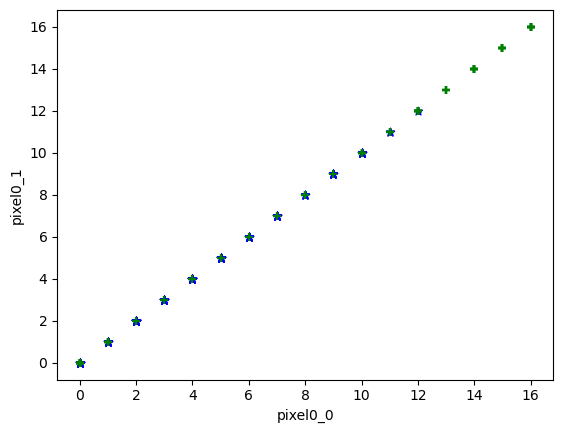

In [62]:
import matplotlib.pyplot as plt
plt.xlabel('pixel0_0')
plt.ylabel('pixel0_1')
plt.scatter(pixel0_0['pixel_0_2'],pixel0_0['pixel_0_2'],color='blue', marker='*')
plt.scatter(pixel0_1['pixel_0_3'],pixel0_1['pixel_0_3'],color='green', marker='+')

In [63]:
X = df.drop(['target'],axis=1)
y=df.target

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 20)

In [65]:
len(x_train)

1437

In [66]:
len(x_test)

360

In [67]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [68]:
kn.score(x_test,y_test)

0.9833333333333333

In [69]:
from sklearn.metrics import confusion_matrix
y_pred = kn.predict(x_test)

In [70]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 28,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 33,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 29]], dtype=int64)

<Axes: >

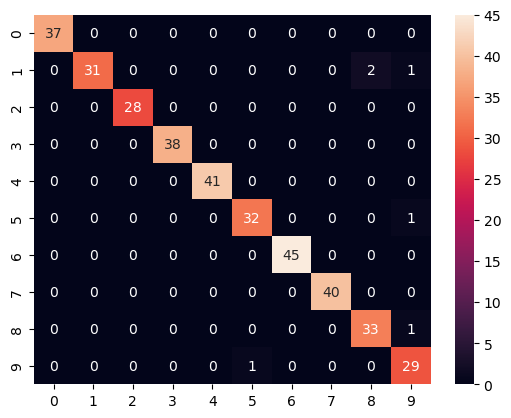

In [71]:
import seaborn as sns
sns.heatmap(cm, annot=True)

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.91      0.95        34
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        41
           5       0.97      0.97      0.97        33
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        40
           8       0.94      0.97      0.96        34
           9       0.91      0.97      0.94        30

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [3, 5, 10, 15, 20]}
clf = GridSearchCV(kn,param_grid, cv=3, return_train_score = False)

In [77]:
clf.fit(digit.data, digit.target)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 10, 15, 20]})

In [78]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [79]:
clf.best_params_

{'n_neighbors': 3}

In [80]:
clf.best_score_

0.9682804674457429